# GAMES

You work for the online store Ice, which sells video games worldwide. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation) and historical data on game sales are available from open sources. You need to identify patterns that determine whether a game is successful or not. This will allow you to identify potential big winners and plan advertising campaigns.

In front of you is data going back to 2016. Let's imagine it's December 2016 and you're planning a campaign for 2017.

(The important thing is to have experience working with data. It doesn't really matter whether you're forecasting 2017 sales based on 2016 data or 2027 sales based on 2026 data).

The data set contains the abbreviation ESRB. The Entertainment Software Rating Board evaluates the content of a game and assigns an age rating, such as Teen or Mature.

**Data description**
* Name 
* Platform 
* Year_of_Release 
* Genre
* NA_sales (in millions of USD)
* EU_sales (in millions of USD)
* JP_sales (in millions of USD)
* Other_sales (sales in other countries in millions of USD)
* Critic_Score - (maximum of 100)
* User_Score - (maximum of 10)
* Rating (ESRB)


 ## Initialization

In [1]:
import pandas as pd
from scipy import stats as st
import numpy as np
from matplotlib import pyplot as plt
from math import factorial
import random
from scipy.stats import norm
from scipy.stats import binom,norm
import matplotlib

## Data

In [2]:
df= pd.read_csv("C:\\Users\\Guilherme\\Downloads\\games.csv")

## Data Visualization

* I'll explore the data, visualize.

### Original Data Frame

In [3]:
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [4]:
df.duplicated().sum()

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [7]:
df.duplicated().sum()

0

## Data pre-processing


* Replace column names (make everything lowercase).
* If necessary, decide how to deal with missing values.
* Convert the data to the required types.
* Calculate the total sales (the sum of sales in all regions) for each game and place these values in a separate column.

### Correcting the columns

* I'll make everything lowercase and shorten a column.

In [8]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [9]:
df.columns = df.columns.str.lower()
df = df.rename(columns={'year_of_release': 'yor'})

In [10]:
df.columns

Index(['name', 'platform', 'yor', 'genre', 'na_sales', 'eu_sales', 'jp_sales',
       'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Filling Missing Values

* Visualizing the total number of missing values

In [11]:
df.isna().sum()

name               2
platform           0
yor              269
genre              2
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score    8578
user_score      6701
rating          6766
dtype: int64

* Replace the two unknown names with `unknown`, I believe it is the best method since they are not numbers to determine the mean and median for example, name is something unique should remain so. Besides being just two missing names.

In [12]:

df['name'] = df['name'].fillna('unknown')

df['name'].isna().sum()

0

In [13]:
df[df['yor'].isna()]

,name,platform,yor,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


* Games without `yor` tend to be old and not very popular, with a few exceptions.

* Because `yor` is a number, I believe that if I replace it with the average of the year of release of games in the same genre and on the same platform, it will be the best option.

In [14]:
dfyor= df.pivot_table(index='genre', columns='platform' ,values='yor', aggfunc='median')
dfyor

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
genre,,,,,,,,,,,,,,,,,,,,,
Action,1982.0,NaN,2013.0,2000.0,2008.0,1999.5,2003.0,2004.0,1993.0,NaN,...,1997.0,NaN,1993.0,NaN,NaN,2009.0,2014.0,2010.0,2004.0,2015.0
Adventure,1983.0,1995.0,2014.0,2000.0,2008.0,1998.0,2004.0,2004.0,1992.5,NaN,...,1996.5,NaN,1993.0,1995.0,NaN,2009.0,2014.0,2011.0,2004.0,2015.0
Fighting,1980.0,NaN,2012.5,2000.0,2007.0,NaN,2002.0,2003.0,1993.0,NaN,...,1995.0,NaN,1993.0,NaN,NaN,2008.0,2013.0,2010.0,2004.0,2015.0
Misc,1980.0,NaN,2013.0,NaN,2008.0,1997.0,2004.0,2003.0,1994.0,NaN,...,1995.0,1994.0,1995.0,NaN,NaN,2009.0,2014.0,2010.0,2004.0,2014.0
Platform,1982.0,NaN,2013.0,1999.5,2007.0,1995.5,2003.0,2003.0,1994.0,1992.0,...,1997.0,1993.0,1994.0,NaN,NaN,2008.0,2013.0,2009.0,2004.0,2016.0
Puzzle,1982.0,1994.0,2012.0,NaN,2008.0,1992.0,2003.0,2002.0,NaN,NaN,...,1996.0,NaN,1995.0,NaN,NaN,2009.0,2014.0,2007.0,2003.0,NaN
Racing,1982.0,NaN,2011.0,1999.5,2008.0,1990.5,2003.0,2003.0,1994.0,NaN,...,1995.0,1994.0,1993.0,NaN,NaN,2009.0,2013.0,2010.0,2003.0,2015.0
Role-Playing,NaN,NaN,2013.0,2000.0,2008.0,1999.0,2003.0,2003.0,1994.0,NaN,...,1997.0,1994.0,1994.0,NaN,1999.5,2009.0,2015.0,2009.0,2004.0,2015.0
Shooter,1981.0,NaN,2011.0,2000.0,2008.0,1989.0,2002.0,2003.0,1992.0,NaN,...,1995.0,NaN,1993.0,1995.0,NaN,2009.0,2013.0,2010.0,2004.0,2015.0


In [15]:
def aux_fill_NaN(platform,genre):
    try:
        return dfyor[platform][genre]   
    except:
        return 'erro'

In [16]:
aux_fill_NaN('3DS','Puzzle')

2012.0

In [17]:
df['mediana_yor'] = df.apply(lambda row: aux_fill_NaN(row['platform'],row['genre']), axis=1)
df['yor']=df['yor'].fillna(df['mediana_yor'])

In [18]:
df[df['yor']=='erro']

,name,platform,yor,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,mediana_yor


In [19]:
df['yor'].isna().sum()

0

* Gender is also something unique, you can't determine the average gender, even if it were replaced by the most frequent, it would still be uncertain, because there are only two, I don't think it's something that influences much, but I'll leave it unknown.

In [20]:
df['genre'] = df['genre'].fillna('unknown')

df['genre'].isna().sum()

0

In [21]:
df[df['genre']=='unknown']

,name,platform,yor,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,mediana_yor
659,unknown,GEN,1993.0,unknown,1.78,0.53,0.00,0.08,NaN,NaN,NaN,erro
14244,unknown,GEN,1993.0,unknown,0.00,0.00,0.03,0.00,NaN,NaN,NaN,erro


* Since the missing values for `genre` and `name` are the same, it seems to be just an old game without much information, just as the previously missing values for yor tend to be old games.


* I've thought a lot about how to deal with missing values in the criticism columns, but I think the best solution is to replace them with the average since this won't affect future conclusions. 

In [22]:
df['critic_score'] = df['critic_score'].fillna(df['critic_score'].mean())


display(df['critic_score'].isna().sum())


0

* As the rating column is made up of strings, and is unique, I'll just replace it with 'unknown'

In [23]:
df['rating'] = df['rating'].fillna('unknown')
df['rating'].isna().sum()

0

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16715 non-null  object 
 1   platform      16715 non-null  object 
 2   yor           16715 non-null  float64
 3   genre         16715 non-null  object 
 4   na_sales      16715 non-null  float64
 5   eu_sales      16715 non-null  float64
 6   jp_sales      16715 non-null  float64
 7   other_sales   16715 non-null  float64
 8   critic_score  16715 non-null  float64
 9   user_score    10014 non-null  object 
 10  rating        16715 non-null  object 
 11  mediana_yor   16715 non-null  object 
dtypes: float64(6), object(6)
memory usage: 1.5+ MB


In [25]:
df


,name,platform,yor,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,mediana_yor
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.000000,8,E,2009.0
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,68.967679,NaN,unknown,1986.0
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.000000,8.3,E,2009.0
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.000000,8,E,2009.0
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,68.967679,NaN,unknown,1999.0
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,68.967679,NaN,unknown,2011.0
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,68.967679,NaN,unknown,2010.0
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,68.967679,NaN,unknown,2014.0
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,68.967679,NaN,unknown,2003.0


**Conclusion**
* I believe that most of the missing values were missing because they were too old or not relevant in relation to sales (I will deal with the `user_score` later).

### Data Conversion

* According to my analysis, the data type of the `yor` column should be modified, because year is an integer value. And the data type of the `user_score` column should be a float, because it is a decimal value, but first I will create a new `tbd` column with a boolean value of 0 and 1 so that I can deal with the original column later.

In [26]:
df['yor'] = df['yor'].astype(int)
df['yor'].dtype

dtype('int32')

In [27]:
df['tbd'] = 0
df['tbd'] = df.apply(lambda row: row['tbd'] + 1 if row['user_score'] == 'tbd' else row['tbd'], axis=1)
display(df['tbd'].value_counts())
df[df['user_score']=='tbd']

tbd
0    14291
1     2424
Name: count, dtype: int64

,name,platform,yor,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,mediana_yor,tbd
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,68.967679,tbd,E,2009.0,1
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.000000,tbd,E10+,2006.0,1
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,68.967679,tbd,T,2009.0,1
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.000000,tbd,E,2009.0,1
657,Frogger's Adventures: Temple of the Frog,GBA,2004,Adventure,2.15,0.18,0.0,0.07,73.000000,tbd,E,2004.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.000000,tbd,E,2003.0,1
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.000000,tbd,E,2002.0,1
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.000000,tbd,E,2008.0,1
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,68.967679,tbd,E,2008.0,1


In [28]:
df['user_score'] = df['user_score'].replace('tbd',np.nan)
df['user_score'] = df['user_score'].astype(float)
df['user_score'].dtype

dtype('float64')

In [29]:
df['user_score'] = df['user_score'].fillna(df['user_score'].mean())
df['user_score'].isna().sum()

0

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16715 non-null  object 
 1   platform      16715 non-null  object 
 2   yor           16715 non-null  int32  
 3   genre         16715 non-null  object 
 4   na_sales      16715 non-null  float64
 5   eu_sales      16715 non-null  float64
 6   jp_sales      16715 non-null  float64
 7   other_sales   16715 non-null  float64
 8   critic_score  16715 non-null  float64
 9   user_score    16715 non-null  float64
 10  rating        16715 non-null  object 
 11  mediana_yor   16715 non-null  object 
 12  tbd           16715 non-null  int64  
dtypes: float64(6), int32(1), int64(1), object(5)
memory usage: 1.6+ MB


**Conclusion**
* All columns have their names in lower case.
* All columns have no missing values and are filled in the best way possible.
* All data types are correct, int where it should be, float where it should be and obj where it should be.

### Data enrichment
* I calculated the total sales (the sum of sales in all regions) for each game and put these values in a separate column.

In [31]:
df['total_sales'] = df[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)
df

,name,platform,yor,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,mediana_yor,tbd,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.000000,8.000000,E,2009.0,0,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,68.967679,7.125046,unknown,1986.0,0,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.000000,8.300000,E,2009.0,0,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.000000,8.000000,E,2009.0,0,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,68.967679,7.125046,unknown,1999.0,0,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,68.967679,7.125046,unknown,2011.0,0,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,68.967679,7.125046,unknown,2010.0,0,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,68.967679,7.125046,unknown,2014.0,0,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,68.967679,7.125046,unknown,2003.0,0,0.01


* This was the enrichment, in addition to the new tbd column that was made to better organize and deal with missing values, and the yor median to deal with missing values.


## Data Analysis

* I'm going to analyze the number of games released per period




In [32]:
df['yor'].describe()

count    16715.000000
mean      2006.469818
std          5.898850
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: yor, dtype: float64

* I'll separate them by quartile

,name,platform,yor,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,mediana_yor,tbd,total_sales
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,68.967679,7.125046,unknown,1986.0,0,40.24
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,68.967679,7.125046,unknown,1999.0,0,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,68.967679,7.125046,unknown,1992.0,0,30.26
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,68.967679,7.125046,unknown,1985.0,0,28.31
12,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,9.00,6.18,7.20,0.71,68.967679,7.125046,unknown,1999.0,0,23.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.00,0.00,67.000000,7.125046,E,2003.0,1,0.01
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.00,0.00,53.000000,7.125046,E,2002.0,1,0.01
16706,Men in Black II: Alien Escape,GC,2003,Shooter,0.01,0.00,0.00,0.00,68.967679,7.125046,T,2003.0,1,0.01
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,0.01,0.00,0.00,0.00,68.967679,7.125046,unknown,2003.0,0,0.01


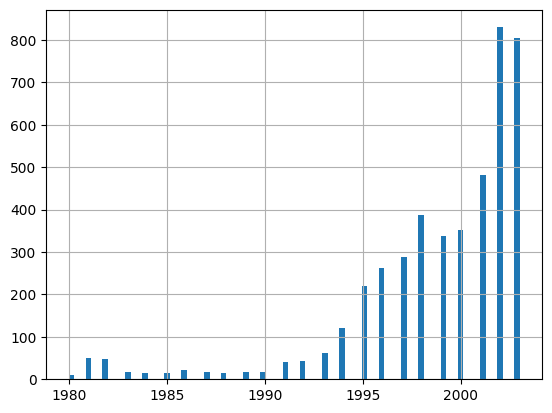

In [33]:
q1 = df[df['yor']<=2003]
display(q1)
q1['yor'].hist( bins=80);

**Conclusion**
* The first games of the original df start in 1980, just like this one (q1). Between 1980 and 1985 there was a slight increase, but the boom occurred between 1991 (approximately 50 games) - 2003 (approximately 50 games). The year with the most games released in this df (q1) was 2002, with over 800 games released. Totaling 4470 games in this period (1980-2003).

,name,platform,yor,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,mediana_yor,tbd,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.000000,8.000000,E,2009.0,0,82.54
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.000000,8.500000,E,2007.0,0,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.000000,6.600000,E,2009.0,0,28.91
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,68.967679,7.125046,unknown,2008.0,0,24.67
11,Mario Kart DS,DS,2005,Racing,9.71,7.47,4.13,1.90,91.000000,8.600000,E,2008.0,0,23.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16664,Mahou Sensei Negima!? Neo-Pactio Fight!!,Wii,2007,Fighting,0.00,0.00,0.01,0.00,68.967679,7.125046,unknown,2008.0,0,0.01
16675,Original Frisbee Disc Sports: Ultimate & Golf,DS,2007,Action,0.01,0.00,0.00,0.00,68.967679,7.125046,unknown,2008.0,0,0.01
16679,XI Coliseum,PSP,2006,Puzzle,0.00,0.00,0.01,0.00,68.967679,7.125046,unknown,2006.0,0,0.01
16701,Eiyuu Densetsu: Sora no Kiseki Material Collec...,PSP,2007,Role-Playing,0.00,0.00,0.01,0.00,68.967679,7.125046,unknown,2009.0,0,0.01


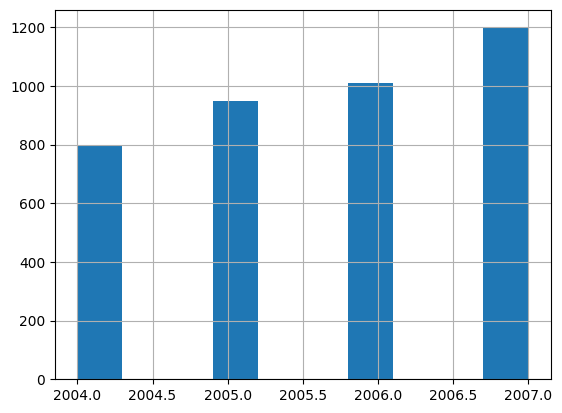

In [34]:
q2 = df[(df['yor']<=2007)& (df['yor']>=2004)]
display(q2)
q2['yor'].hist( bins=10);

**Conclusion**
* With technology on the rise, this period has seen a clear increase, with no lower figures than the previous year. It went from 800 games released in 2004 to 1200 in 2007. Totaling 3957 games in this period (2004-2007), it is interesting to note that although technology has evolved, fewer games have been created in this period (q2) than in the previous one (q1), I believe this is due to the difficulty of obtaining these new technologies or the growth of some companies, thus making smaller producers more careful when releasing games or their probable bankruptcy, but we cannot say this for sure.

,name,platform,yor,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,mediana_yor,tbd,total_sales
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.000000,8.300000,E,2009.0,0,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.000000,8.000000,E,2009.0,0,32.77
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.000000,8.400000,E,2008.0,0,28.32
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.000000,6.300000,E,2010.0,0,21.82
15,Wii Fit Plus,Wii,2009,Sports,9.01,8.49,2.53,1.77,80.000000,7.400000,E,2009.0,0,21.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.00,0.00,48.000000,7.125046,E,2008.0,1,0.01
16700,Mezase!! Tsuri Master DS,DS,2009,Sports,0.00,0.00,0.01,0.00,68.967679,7.125046,unknown,2008.0,0,0.01
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.00,0.00,68.967679,7.125046,E,2008.0,1,0.01
16705,15 Days,PC,2009,Adventure,0.00,0.01,0.00,0.00,63.000000,5.800000,unknown,2010.0,0,0.01


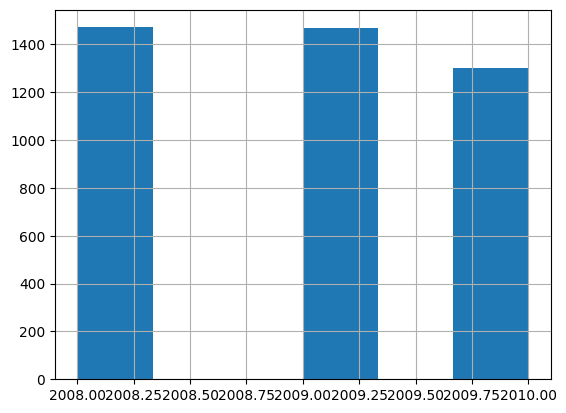

In [35]:
q3 = df[(df['yor']<=2010)& (df['yor']>=2008)]
display(q3)
q3['yor'].hist(bins=6);

**Conclusion**
* 2008 and 2009 saw an almost identical number of games released, exceeding 1400 games. There was a considerable drop in 2010, the first time this has happened since the period between 1980 and 1990, when there was a lot of fluctuation and uncertainty. Perhaps this was due to the probable bankruptcy of small companies, or the rise of social networks fighting for attention, but we can't say for sure. The total number of games released in this period was 4,236.

,name,platform,yor,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,mediana_yor,tbd,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.000000,8.200000,M,2011.0,0,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.000000,8.100000,M,2010.0,0,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.000000,3.400000,M,2010.0,0,14.73
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,68.967679,7.125046,unknown,2015.0,0,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,68.967679,7.125046,unknown,2013.0,0,14.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,68.967679,7.125046,unknown,2014.0,0,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,68.967679,7.125046,unknown,2014.0,0,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,68.967679,7.125046,unknown,2011.0,0,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,68.967679,7.125046,unknown,2014.0,0,0.01


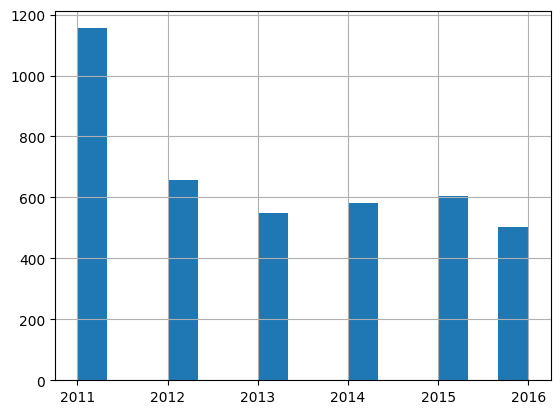

In [36]:
q4= df[df['yor']>=2011]
display(q4)
q4['yor'].hist( bins=15);

**Conclusion**
* This period shows a clear decline, reaching its peak in 2011 with almost 1200 games released and reaching its lowest in 2016 with approximately 500 games released in the year. A probable reason for this could be the rise of streaming and social networks fighting more and more for your attention, but we can't say for sure. The total number of games created in this period was 4052. 

### Viewing Platforms


In [37]:
len(df['platform'].unique())

31

In [38]:
df['total_sales'].describe()

count    16715.000000
mean         0.533396
std          1.548261
min          0.000000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.540000
Name: total_sales, dtype: float64

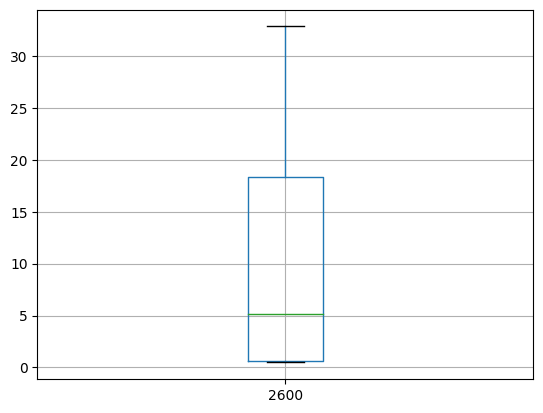

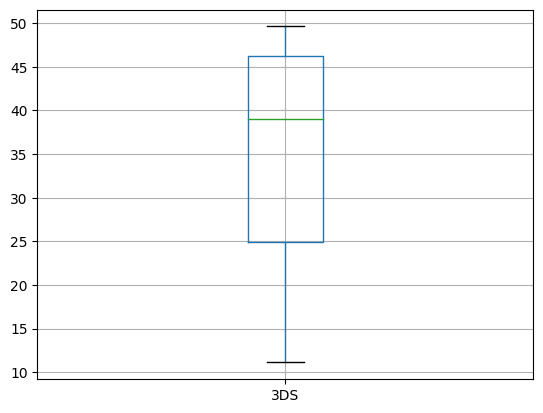

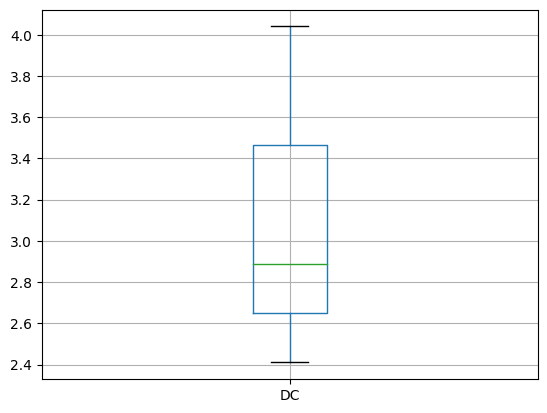

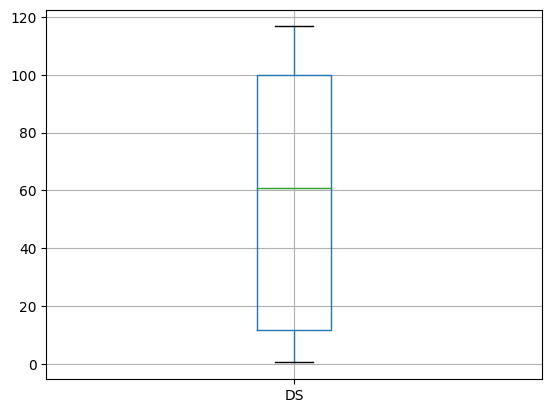

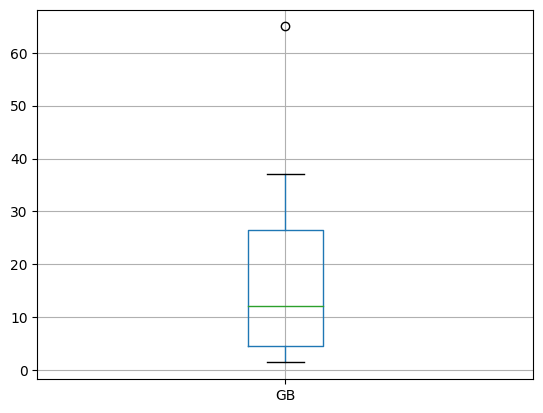

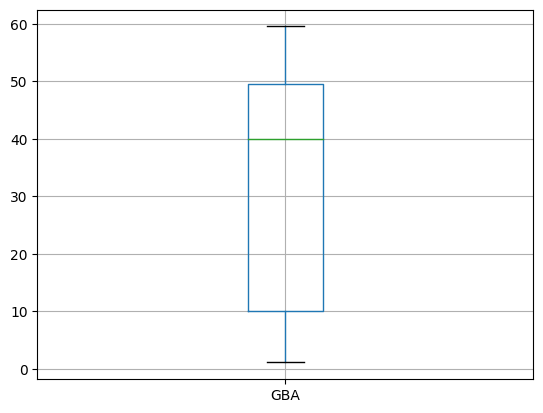

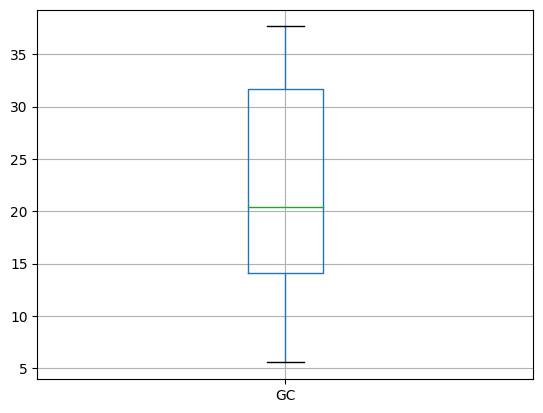

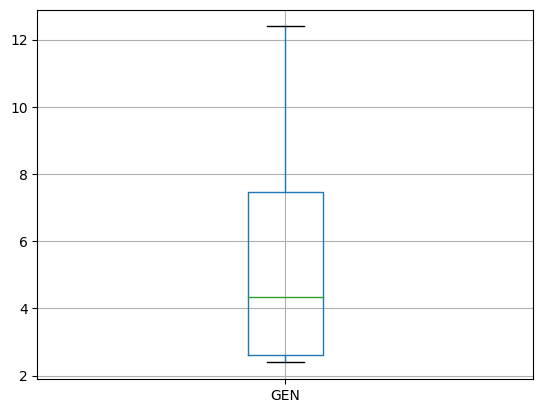

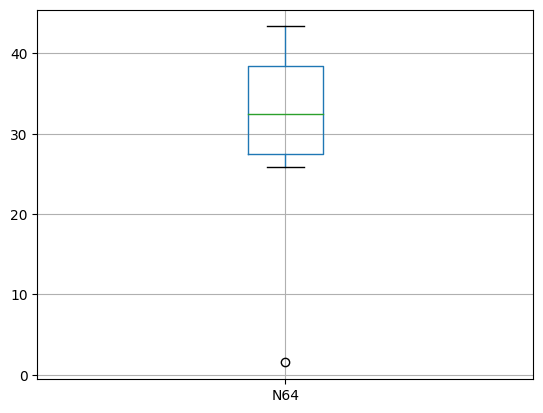

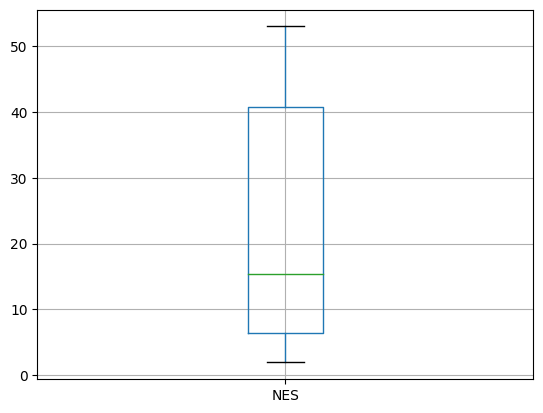

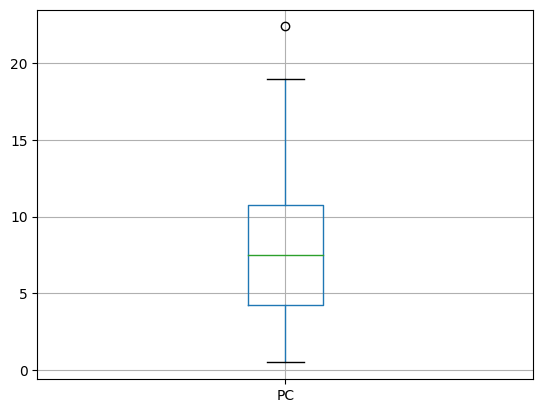

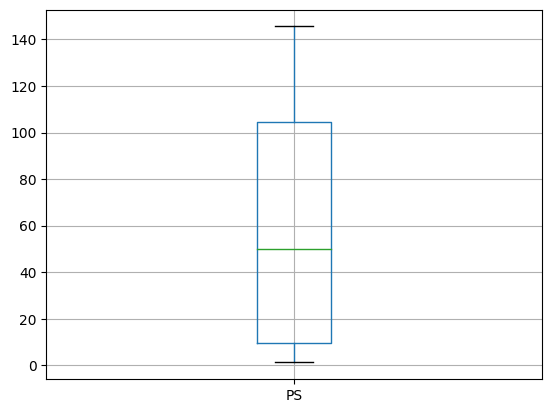

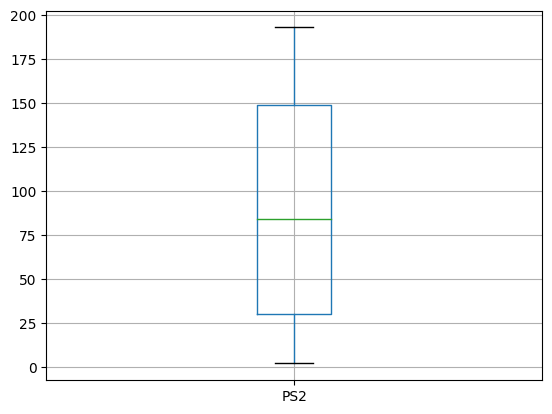

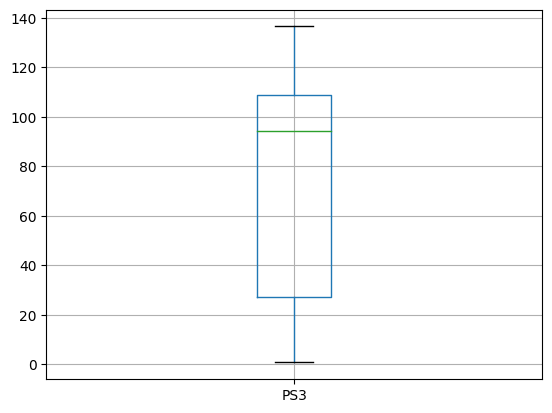

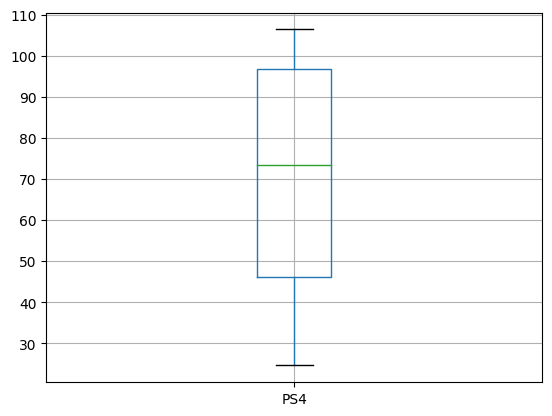

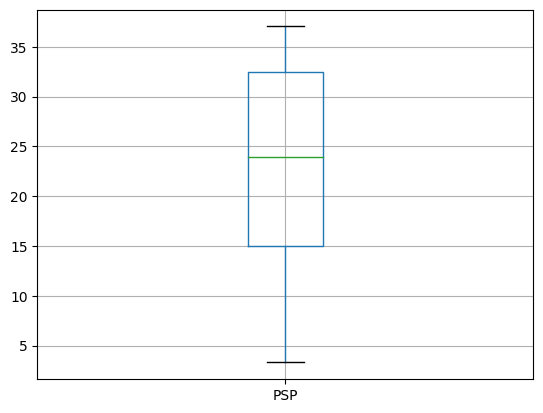

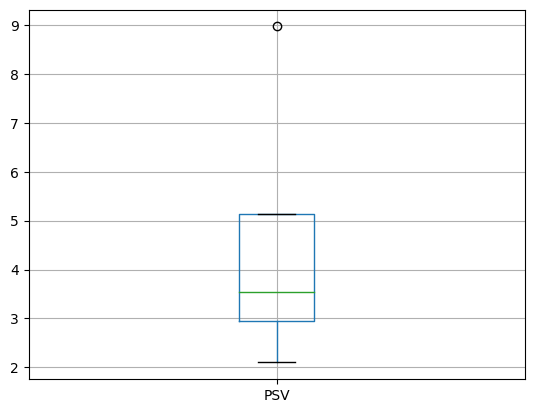

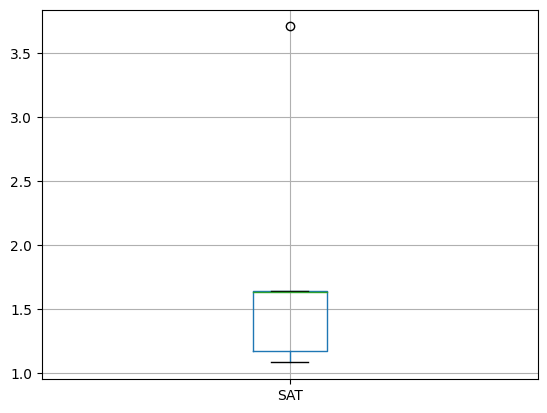

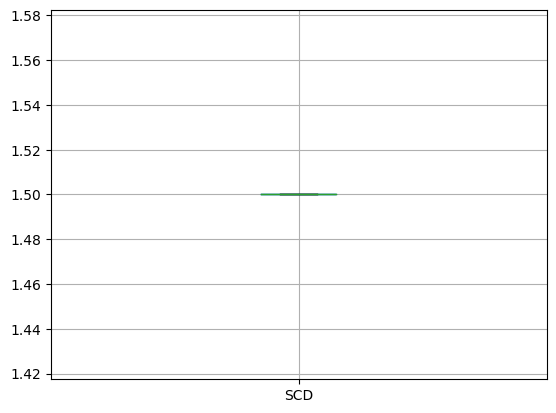

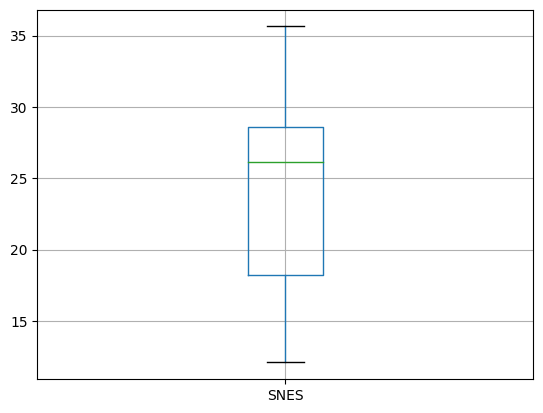

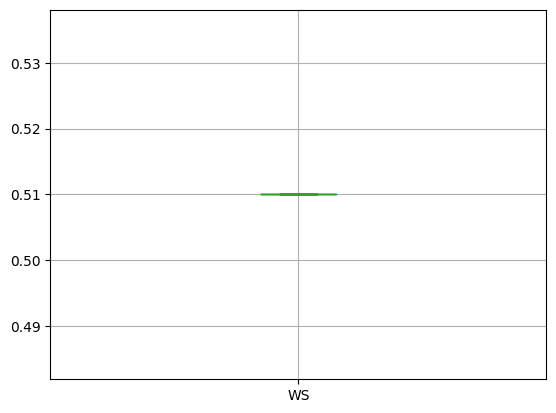

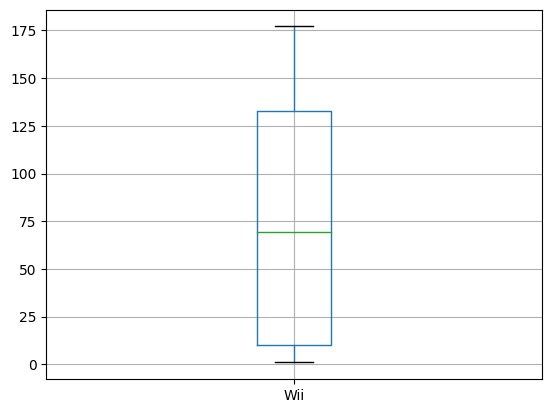

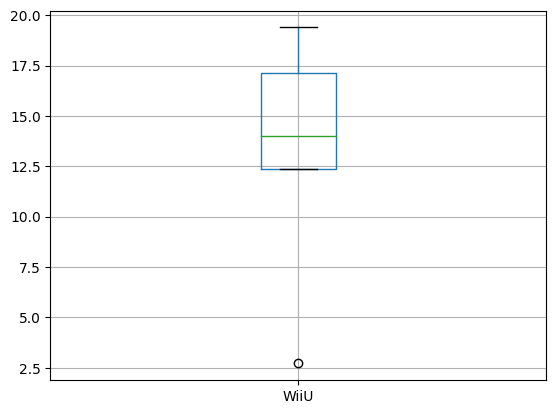

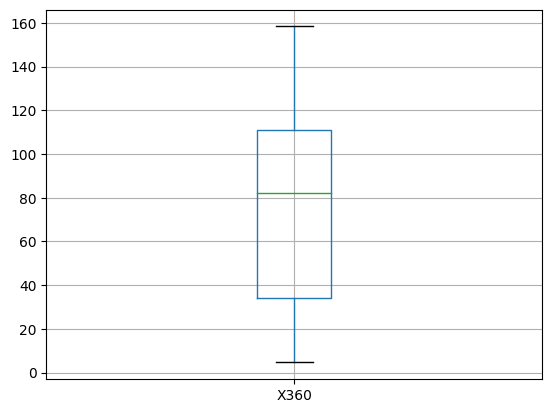

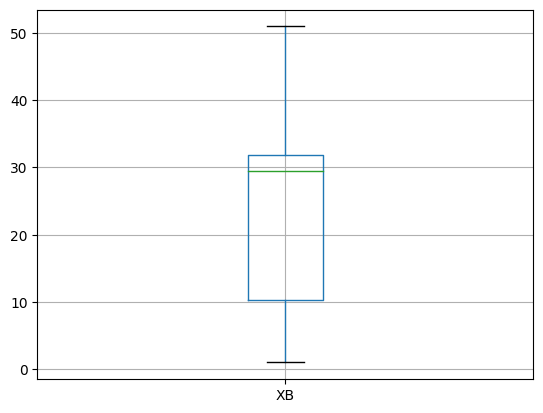

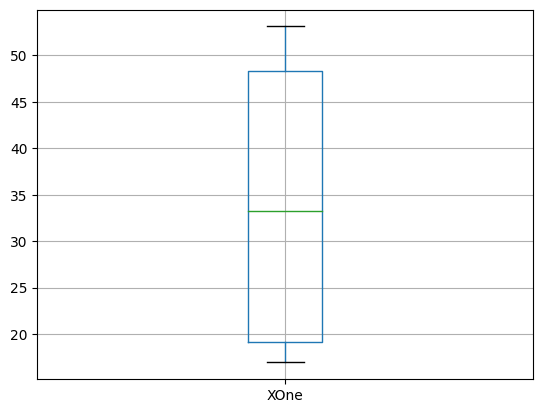

In [39]:


max_sales = 0.470000
df1 = df.query('total_sales>@max_sales')

len(df1['platform'].unique())#=26

df2= df1.pivot_table(index='yor',columns='platform', values='total_sales', aggfunc='sum')
df2.columns

cols = ['2600', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'N64', 'NES', 'PC',
       'PS', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV', 'SAT', 'SCD', 'SNES', 'WS',
       'Wii', 'WiiU', 'X360', 'XB', 'XOne']
for col in cols:
    df2.boxplot(column=[col]);
    plt.show()

In [40]:
df2

platform,2600,3DS,DC,DS,GB,GBA,GC,GEN,N64,NES,...,PSV,SAT,SCD,SNES,WS,Wii,WiiU,X360,XB,XOne
yor,,,,,,,,,,,,,,,,,,,,,
1980,10.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981,32.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982,26.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983,5.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.96,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.41,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987,0.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.76,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988,0.51,NaN,NaN,NaN,1.43,NaN,NaN,NaN,NaN,45.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* Platforms chosen for sale apart from the pc which has been on the market for a long time

In [41]:
display(df2['PC'].dropna())
df2['PC'].describe()

yor
1992     2.93
1994    12.85
1995     4.20
1996    10.58
1997    11.25
1998     2.70
1999     4.56
2000     4.32
2001     5.02
2002     8.07
2003     7.40
2004     8.67
2005     2.24
2006     0.51
2007     7.07
2008     9.79
2009    11.54
2010    18.96
2011    22.37
2012    17.90
2013     9.09
2014     7.61
2015     4.24
2016     1.18
Name: PC, dtype: float64

count    24.000000
mean      8.127083
std       5.657453
min       0.510000
25%       4.230000
50%       7.505000
75%      10.747500
max      22.370000
Name: PC, dtype: float64

In [42]:
display(df2['Wii'].dropna())
df2['Wii'].describe()

yor
2006    133.10
2007    132.78
2008    138.94
2009    177.07
2010     98.13
2011     40.60
2012     19.12
2013      7.33
2014      3.52
2015      0.95
Name: Wii, dtype: float64

count     10.000000
mean      75.154000
std       67.686748
min        0.950000
25%       10.277500
50%       69.365000
75%      133.020000
max      177.070000
Name: Wii, dtype: float64

In [43]:
display(df2['WiiU'].dropna())
df2['WiiU'].describe()

yor
2012    12.34
2013    17.11
2014    19.39
2015    13.98
2016     2.71
Name: WiiU, dtype: float64

count     5.000000
mean     13.106000
std       6.421606
min       2.710000
25%      12.340000
50%      13.980000
75%      17.110000
max      19.390000
Name: WiiU, dtype: float64

In [44]:
display(df2['PS'].dropna())
df2['PS'].describe()

yor
1994      3.40
1995     24.87
1996     75.05
1997    114.40
1998    145.53
1999    121.04
2000     74.82
2001     24.96
2002      4.66
2003      1.24
Name: PS, dtype: float64

count     10.000000
mean      58.997000
std       54.382829
min        1.240000
25%        9.712500
50%       49.890000
75%      104.562500
max      145.530000
Name: PS, dtype: float64

In [45]:
display(df2['PSP'].dropna())
df2['PSP'].describe()

yor
2004     5.82
2005    33.17
2006    37.04
2007    32.23
2008    25.80
2009    22.08
2010    18.11
2011     3.31
Name: PSP, dtype: float64

count     8.000000
mean     22.195000
std      12.512886
min       3.310000
25%      15.037500
50%      23.940000
75%      32.465000
max      37.040000
Name: PSP, dtype: float64

In [46]:
display(df2['PSV'].dropna())
df2['PSV'].describe()

yor
2011    2.10
2012    8.97
2013    3.24
2014    3.85
Name: PSV, dtype: float64

count    4.000000
mean     4.540000
std      3.041085
min      2.100000
25%      2.955000
50%      3.545000
75%      5.130000
max      8.970000
Name: PSV, dtype: float64

In [47]:
display(df2['PS2'].dropna())
df2['PS2'].describe()

yor
2000     29.35
2001    146.45
2002    172.34
2003    151.83
2004    193.02
2005    132.29
2006     83.77
2007     54.77
2008     30.66
2009     13.02
2010      1.85
Name: PS2, dtype: float64

count     11.000000
mean      91.759091
std       69.521881
min        1.850000
25%       30.005000
50%       83.770000
75%      149.140000
max      193.020000
Name: PS2, dtype: float64

In [48]:
display(df2['PS3'].dropna())
df2['PS3'].describe()

yor
2006     18.81
2007     63.35
2008    104.26
2009    113.62
2010    124.07
2011    136.48
2012     94.19
2013    100.84
2014     35.82
2015     10.68
2016      0.73
Name: PS3, dtype: float64

count     11.000000
mean      72.986364
std       48.997830
min        0.730000
25%       27.315000
50%       94.190000
75%      108.940000
max      136.480000
Name: PS3, dtype: float64

In [49]:
display(df2['PS4'].dropna())
df2['PS4'].describe()

yor
2013     24.57
2014     93.48
2015    106.36
2016     53.42
Name: PS4, dtype: float64

count      4.00000
mean      69.45750
std       37.46538
min       24.57000
25%       46.20750
50%       73.45000
75%       96.70000
max      106.36000
Name: PS4, dtype: float64

In [50]:
display(df2['XB'].dropna())
df2['XB'].describe()

yor
2000     0.99
2001    17.26
2002    30.48
2003    33.23
2004    50.98
2005    29.48
2006     3.18
Name: XB, dtype: float64

count     7.000000
mean     23.657143
std      17.760778
min       0.990000
25%      10.220000
50%      29.480000
75%      31.855000
max      50.980000
Name: XB, dtype: float64

In [51]:
display(df2['X360'].dropna())
df2['X360'].describe()


yor
2005      4.65
2006     40.15
2007     79.22
2008    121.62
2009    100.45
2010    158.35
2011    121.96
2012     89.97
2013     81.95
2014     27.96
2015      7.47
Name: X360, dtype: float64

count     11.000000
mean      75.795455
std       50.193177
min        4.650000
25%       34.055000
50%       81.950000
75%      111.035000
max      158.350000
Name: X360, dtype: float64

In [52]:
display(df2['XOne'].dropna())
df2['XOne'].describe()

yor
2013    16.95
2014    46.70
2015    53.10
2016    19.85
Name: XOne, dtype: float64

count     4.000000
mean     34.150000
std      18.411364
min      16.950000
25%      19.125000
50%      33.275000
75%      48.300000
max      53.100000
Name: XOne, dtype: float64

* Based on the most recent successful platforms that are already dead

In [91]:
average_life = (11 + 4 + 8 + 10 + 10+ 7+ 11)/7
average_life

8.714285714285714

**Conclusion**
* Based on the previous data analysis, we can see that the PS3 platform has the highest average sales, peaking in 2011 when the platform that previously dominated the market (PS2) died. PS3 game sales fell sharply in 2016, reaching less than 1 million dollars, leading to its probable death in the next few years. 
* The best-selling platform in its history was the PS2, which reached its peak in 2004 with sales of 193.02 million dollars from games sold for this platform.
* Platforms such as Wii, XB and Xbox 360 were very popular a few years ago and no longer sell. 
* The most consolidated platform, in terms of having more years on the market, is the PC, which began in 1992 and had an atypical year shortly afterwards, but recovered and is still selling today (2016).
* We can see similar behaviors in different platforms, in which when their game sales fall they create new platforms to try to get back into the competitive market, but the wiiu was only created in the second year of the wii's fall, while the playstation line has always launched a new platform in the first year of the previous one's fall (with the exception of the ps3 to the ps4 because in the year the ps4 was launched the ps3 recovered its fall, but the company knew that its 'life' was running out anyway), perhaps that's why they are still doing well in the market today.
* Based on the most recent successful platforms that have already died, we can estimate an average lifespan for each platform of 8.7 years.
* Xbox was another brand in the more recent market, but its platforms always lost out to the Playstation 'correspondents'. Only the Xbox 360 had a higher sales peak compared to the PS3, but as previously stated, the PS3 is the owner of the highest average.

* I will select the model for the year 2017 from the year 2000, as there is a significant difference.

In [54]:
time=2000

df17=df1.query('yor>=@time').reset_index()
display(df17)
display(df17['user_score'].describe())#75% = 8.1
df17['critic_score'].describe()#75%=82

,index,name,platform,yor,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,mediana_yor,tbd,total_sales
0,0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.000000,8.000000,E,2009.0,0,82.54
1,2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.000000,8.300000,E,2009.0,0,35.52
2,3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.000000,8.000000,E,2009.0,0,32.77
3,6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.000000,8.500000,E,2007.0,0,29.80
4,7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.000000,6.600000,E,2009.0,0,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3439,4208,Metal Gear Solid: The Essential Collection,PS2,2007,Adventure,0.23,0.18,0.00,0.06,68.967679,8.900000,M,2007.0,0,0.47
3440,4209,One Piece: Pirate Warriors 3,PS4,2015,Action,0.09,0.22,0.10,0.06,74.000000,7.400000,T,2015.0,0,0.47
3441,4215,Destroy All Humans!,XB,2005,Shooter,0.34,0.11,0.00,0.02,68.967679,7.125046,unknown,2004.0,0,0.47
3442,4217,Imagine: Figure Skater (US sales),DS,2007,Sports,0.46,0.01,0.00,0.00,68.967679,7.125046,unknown,2008.0,0,0.47


count    3444.000000
mean        7.336051
std         1.143915
min         0.000000
25%         7.100000
50%         7.200000
75%         8.100000
max         9.600000
Name: user_score, dtype: float64

count    3444.000000
mean       74.293539
std        10.753484
min        20.000000
25%        68.967679
50%        73.000000
75%        82.000000
max        98.000000
Name: critic_score, dtype: float64

### Viewing Criticism

1783.8100000000002

2297.08

,total_sales
critic_score,
82.0,1.942079
83.0,1.830374
84.0,1.912264
85.0,2.065109
86.0,1.771548
87.0,2.434667
88.0,2.562297
89.0,2.217794
90.0,1.944038


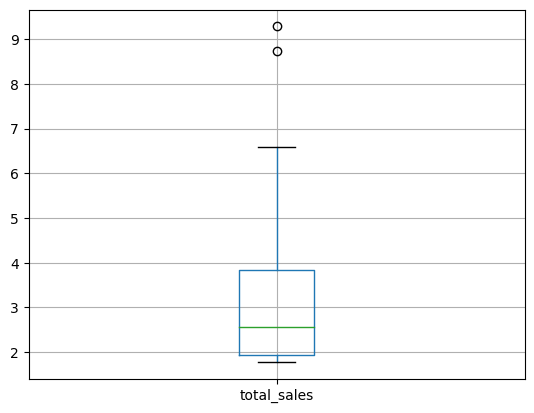

In [55]:

df17['user_score'].describe()#75% = 8
critic=8.1
dfcritu= df17.query('user_score>=@critic')
display(dfcritu['total_sales'].sum())
criticc=82
dfcritc=df17.query('critic_score>=@criticc')
display(dfcritc['total_sales'].sum())
gg=dfcritc.pivot_table(index='critic_score', values='total_sales',aggfunc='mean')
gg.boxplot()
gg

* Viewed criticism of the `user_score` column

,total_sales
user_score,
8.1,1.473495
8.2,1.829048
8.3,1.798526
8.4,1.875000
8.5,2.164271
8.6,1.960968
8.7,2.240723
8.8,1.665821
8.9,1.898861


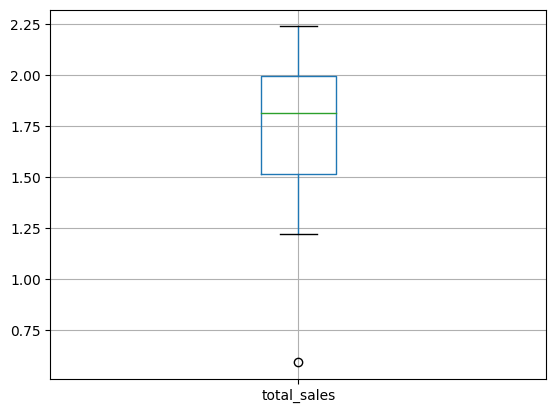

In [56]:
gg2=dfcritu.pivot_table(index='user_score', values='total_sales',aggfunc='mean')
gg2.boxplot()
gg2

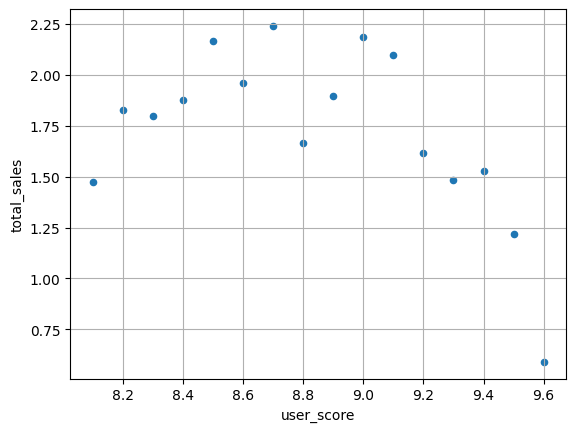

In [57]:
gt=dfcritu.pivot_table(index='user_score', values='total_sales',aggfunc='mean').reset_index()
gt.plot(x='user_score',y='total_sales', kind='scatter', grid=True);

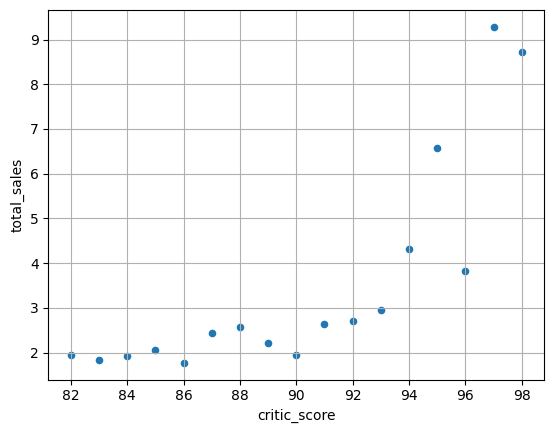

In [58]:
gh= dfcritc.pivot_table(index='critic_score', values='total_sales',aggfunc='mean').reset_index()
gh.plot(x='critic_score', y='total_sales', kind='scatter', grid=True);

In [59]:
gh['critic_score'].corr(gh['total_sales'])

0.7913074473667293

In [60]:
gt['user_score'].corr(gt['total_sales'])

-0.5124963267226352

* Here we can see that the critical score is worth more in relation to sales, when a critical score is higher the average sales is also higher. We see a strong relationship in that the better the critic_score the higher the average sales, whereas in the user_score this is not observable, it is something more random, since the lowest score has the highest average sales and the best score has the worst.
* The correlation values confirm this: the correlation of the critics' scores is approximately 0.8, which means that when the critics' scores increase, the average sales also increase. On the other hand, the correlation of user scores shows a slight inverse correlation, with a value of -0.5, meaning that when the score increases, the average sales can sometimes decrease. The highest concentration of sales is between 8.5 and 9.1.

### Viewing Games

* With my conclusions in mind, I compared the sales of the same games on other platforms.

In [61]:
dfbom = df17
dfbom.columns



Index(['index', 'name', 'platform', 'yor', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating',
       'mediana_yor', 'tbd', 'total_sales'],
      dtype='object')

In [93]:
dfbom['name'].value_counts()

name
Madden NFL 07                  7
LEGO Marvel Super Heroes       7
Need for Speed: Most Wanted    7
Minecraft                      6
FIFA Soccer 10                 6
                              ..
Fuzion Frenzy                  1
NASCAR Thunder 2003            1
NBA 2K2                        1
Golden Sun: The Lost Age       1
SingStar Amped                 1
Name: count, Length: 2366, dtype: int64

Year of release: [2013]
Genre of the game: ['Action']


,platform,total_sales
3,PSV,0.51
4,WiiU,0.74
0,3DS,0.89
6,XOne,1.05
2,PS4,1.62
1,PS3,1.83
5,X360,2.22


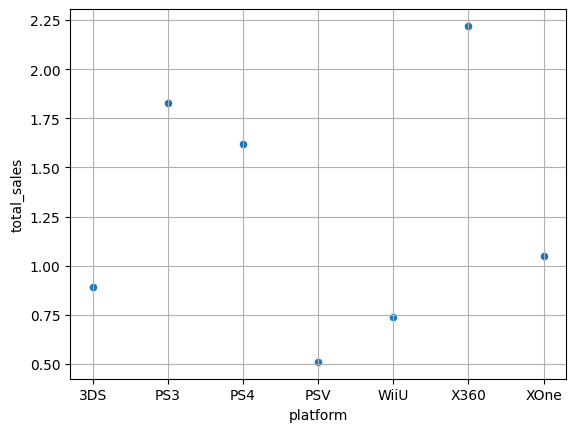

In [63]:
#I used the five most frequent games
#LEGO Marvel Super Heroes
lego=dfbom[dfbom['name']=='LEGO Marvel Super Heroes']           
print('Year of release:',lego['yor'].unique())
print('Genre of the game:',lego['genre'].unique())
lego1= lego.pivot_table(index='platform', values='total_sales',aggfunc='mean').reset_index()
display(lego1.sort_values(by='total_sales'))
lego1.plot.scatter(x='platform',y='total_sales', grid=True);

Year of release: [2005 2012]
Genre of the game: ['Racing']


,platform,total_sales
0,GC,0.560
3,PSV,1.010
5,XB,1.040
4,X360,1.405
2,PS3,2.810
1,PS2,4.370


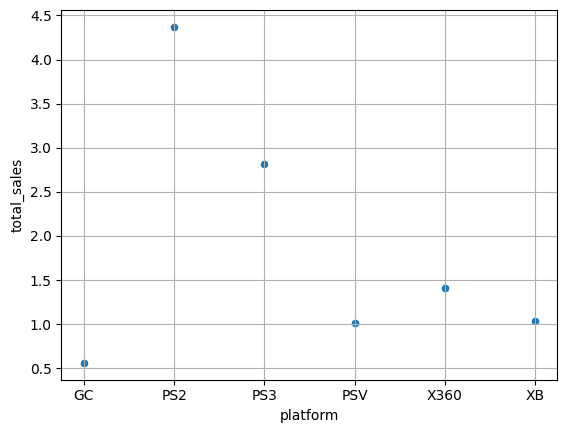

In [64]:
#Need for Speed: Most Wanted 
speed=dfbom[dfbom['name']=='Need for Speed: Most Wanted']           
print('Year of release:',speed['yor'].unique())
print('Genre of the game:',speed['genre'].unique())
speed1= speed.pivot_table(index='platform', values='total_sales',aggfunc='mean').reset_index()
display(speed1.sort_values(by='total_sales'))
speed1.plot.scatter(x='platform',y='total_sales', grid=True);


Year of release: [2006 2008]
Genre of the game: ['Sports']


,platform,total_sales
4,Wii,0.50
2,PS3,0.52
0,GC,0.63
3,PSP,0.84
6,XB,1.03
5,X360,1.80
1,PS2,4.49


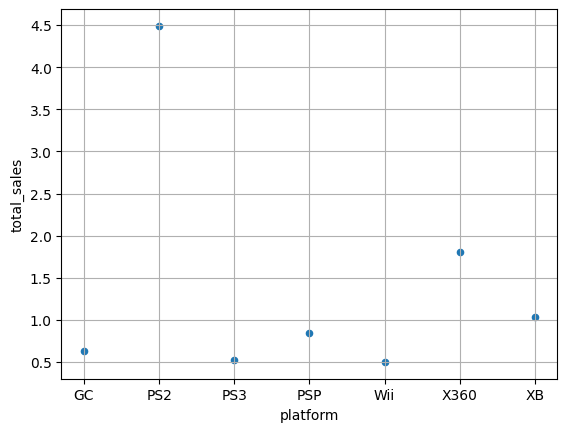

In [65]:
#Madden NFL 07                       
nfl=dfbom[dfbom['name']=='Madden NFL 07']           
print('Year of release:',nfl['yor'].unique())
print('Genre of the game:',nfl['genre'].unique())
nfl1= nfl.pivot_table(index='platform', values='total_sales',aggfunc='mean').reset_index()
display(nfl1.sort_values(by='total_sales'))
nfl1.plot.scatter(x='platform',y='total_sales', grid=True);



Year of release: [2013 2014 2016]
Genre of the game: ['Misc']


,platform,total_sales
3,WiiU,0.67
2,PSV,1.96
5,XOne,2.76
1,PS4,4.32
0,PS3,5.27
4,X360,9.18


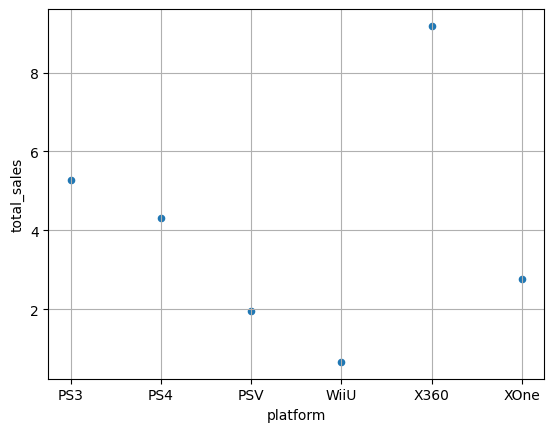

In [92]:
#Minecraft      
mine=dfbom[dfbom['name']=='Minecraft']           
print('Year of release:',mine['yor'].unique())
print('Genre of the game:',mine['genre'].unique())
mine1= mine.pivot_table(index='platform', values='total_sales',aggfunc='mean').reset_index()
display(mine1.sort_values(by='total_sales'))
mine1.plot.scatter(x='platform',y='total_sales', grid=True);

Year of release: [2009]
Genre of the game: ['Sports']


,platform,total_sales
0,DS,0.58
4,Wii,0.98
3,PSP,1.14
1,PS2,1.70
5,X360,2.62
2,PS3,3.62


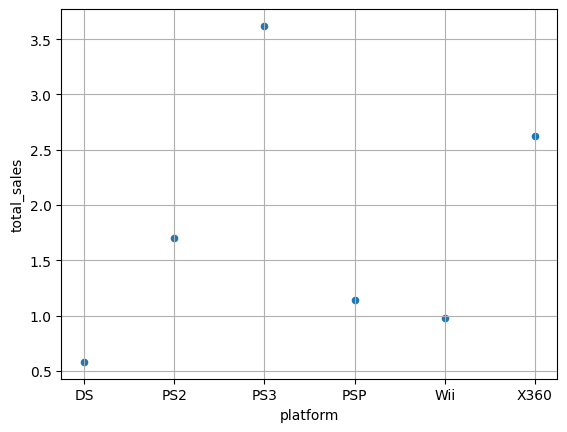

In [94]:
#FIFA Soccer 10
fifa=dfbom[dfbom['name']=='FIFA Soccer 10']           
print('Year of release:',fifa['yor'].unique())
print('Genre of the game:',fifa['genre'].unique())
fifa1= fifa.pivot_table(index='platform', values='total_sales',aggfunc='mean').reset_index()
display(fifa1.sort_values(by='total_sales'))
fifa1.plot.scatter(x='platform',y='total_sales', grid=True);

* I found the 5 games with the most different platforms and among them 2 are action games (40%), 2 sports games (40%) and 1 misc game (20%).

### Viewing Genres

In [68]:
dfgenre= dfbom.pivot_table(index='genre', values='total_sales', aggfunc='sum').reset_index()
dfgenre.sort_values('total_sales')

,genre,total_sales
11,Strategy,61.65
1,Adventure,90.95
5,Puzzle,95.17
2,Fighting,245.77
9,Simulation,250.74
4,Platform,416.03
6,Racing,456.45
3,Misc,545.80
7,Role-Playing,598.31
8,Shooter,812.20


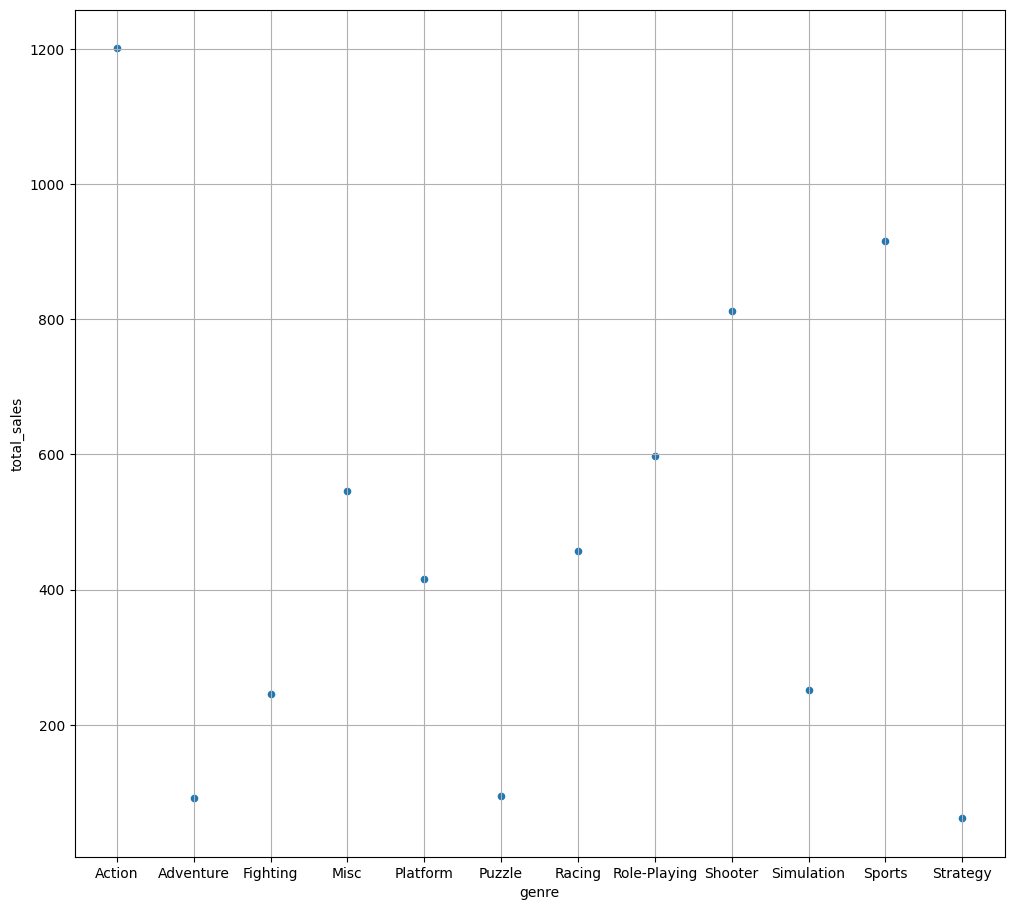

In [69]:
dfgenre.plot.scatter(x='genre',y='total_sales',figsize=(12,11), grid=True);

**Conclusion**
* The most profitable game genre is action, followed by sports and shooters. I believe they are in this position because of the adrenaline rush they are likely to give the player. Something else that confirms this assumption is that games that require you to think are in the last positions.
* Games in the action, sports and shooter genres are likely to be multiplatform and therefore the most profitable.

## Creating a user profile for each region

### Na

In [70]:
dfna=dfbom.drop(columns=['eu_sales','jp_sales', 'total_sales','other_sales'])
dfna = dfna[dfna['na_sales']>=0.01]
dfna['na_sales'].describe()

count    3309.000000
mean        0.836419
std         1.326055
min         0.010000
25%         0.320000
50%         0.500000
75%         0.890000
max        41.360000
Name: na_sales, dtype: float64

In [71]:
dfna['platform'].value_counts()
top5Na={'PS2':622, 'PS3':488, 'X360':462, 'Wii':334,'DS':290}
top5Na
#number of games sold for each platform

{'PS2': 622, 'PS3': 488, 'X360': 462, 'Wii': 334, 'DS': 290}

In [72]:
dfnap=dfna.pivot_table(index='platform',values='na_sales',aggfunc='sum').reset_index()
display(dfnap.sort_values('na_sales'))
dfnag = dfna.pivot_table(index='genre',values='na_sales',aggfunc='sum').reset_index()
dfnag.sort_values('na_sales')

,platform,na_sales
1,DC,2.53
13,PSV,5.61
3,GB,9.12
6,N64,15.58
15,WiiU,30.11
8,PS,49.71
7,PC,52.26
12,PSP,63.78
0,3DS,67.30
18,XOne,80.00


,genre,na_sales
11,Strategy,27.38
5,Puzzle,37.82
1,Adventure,43.74
9,Simulation,112.84
2,Fighting,129.40
4,Platform,208.79
6,Racing,210.60
7,Role-Playing,235.20
3,Misc,270.93
8,Shooter,437.52


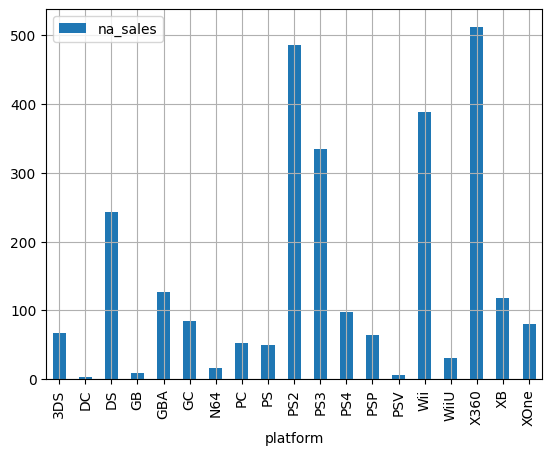

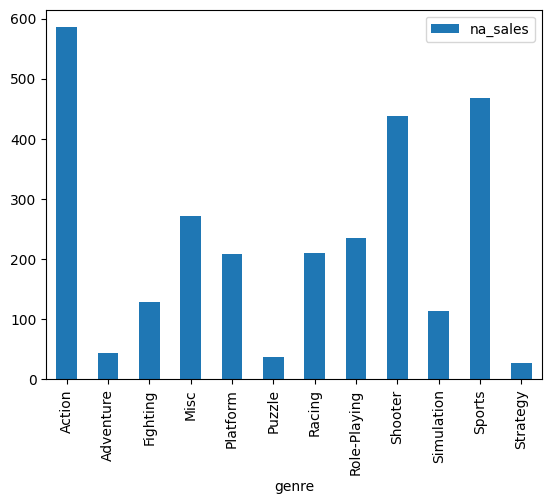

In [73]:
dfnap.plot(kind='bar',x='platform',y='na_sales',grid=True);
dfnag.plot(kind='bar',x='genre',y='na_sales');

**Conclusion**
* On the platform: The platform that has the most sales is the PS2 with 622 games sold, however the xbox360 is the one that leads the billing, having sold a total of 512.18 million USD in 462 games(also behind the PS3 with 488 games sold) having an average of approximately 1.1 million USD billed per game. The data for the PS2 platform is different, with a total turnover of 485.52 million USD, with an average turnover per game of approximately 0.78 million USD. We therefore conclude that the PS2 and PS3 were the most popular in terms of number of games in NA, but not the most profitable. 
* NA genre: The most profitable genres follow the pattern of the complete data frame, being action, sports and shooting in that order. The action genre sold 585.38 million USD, sports 468.11 million USD and shooters 437.52.

### Eu

In [74]:
dfeu=dfbom.drop(columns=['na_sales','jp_sales', 'total_sales','other_sales'])
dfeu = dfeu[dfeu['eu_sales']>=0.01]
dfeu['eu_sales'].describe()


count    3226.000000
mean        0.545462
std         0.984680
min         0.010000
25%         0.170000
50%         0.310000
75%         0.570000
max        28.960000
Name: eu_sales, dtype: float64

In [75]:
dfeu['platform'].value_counts()
top5Eu={'PS2':617,'PS3':476,'X360':440,'Wii':308,'DS':267}
top5Eu
#number of games sold for each platform

{'PS2': 617, 'PS3': 476, 'X360': 440, 'Wii': 308, 'DS': 267}

In [76]:
dfeup=dfeu.pivot_table(index='platform',values='eu_sales',aggfunc='sum').reset_index()
display(dfeup.sort_values('eu_sales'))
dfeug = dfeu.pivot_table(index='genre',values='eu_sales',aggfunc='sum').reset_index()
dfeug.sort_values('eu_sales')

,platform,eu_sales
1,DC,0.79
6,N64,4.81
3,GB,5.19
13,PSV,6.64
15,WiiU,19.82
5,GC,25.90
8,PS,36.03
17,XB,41.03
18,XOne,43.95
0,3DS,51.86


,genre,eu_sales
11,Strategy,18.46
1,Adventure,30.64
5,Puzzle,30.86
2,Fighting,63.38
9,Simulation,88.38
4,Platform,121.09
7,Role-Playing,135.78
6,Racing,160.63
3,Misc,163.06
8,Shooter,264.83


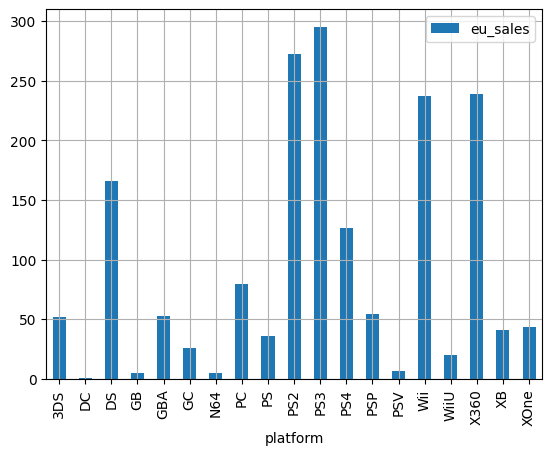

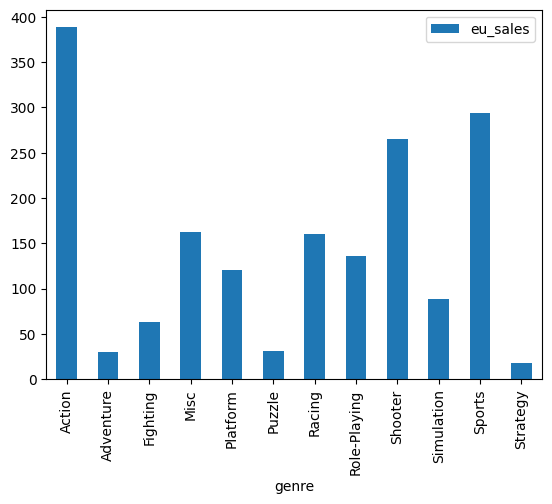

In [77]:
dfeup.plot(kind='bar',x='platform',y='eu_sales',grid=True);
dfeug.plot(kind='bar',x='genre',y='eu_sales');

**Conclusion**
* EU platform: Just as in NA in Europe the most popular platforms in terms of numbers of games are the playstation, with the PS2 having 617 games sold and the PS3 having 476 games sold. However, the main difference compared to NA is that the sales leader is the PS3 with 295.14 million USD in games sold, followed by the PS2 with 272.47 million USD, and then the Xbox 360 with 239.03 million USD and 462 games sold. Here the second most popular leads the sales. We can see a strong preference for the PlayStation over the Xbox, as it is third in everything. 
* EU genre: Follows the same pattern as NA and the complete data frame in which action is the top seller (388.36 million USD), sports (294.19 million USD) and shooting (264.83 million USD).

### Jp

In [78]:
dfjp=dfbom.drop(columns=['na_sales','eu_sales', 'total_sales','other_sales'])
dfjp = dfjp[dfjp['jp_sales']>=0.01]
dfjp['jp_sales'].describe()

count    1567.000000
mean        0.349087
std         0.675378
min         0.010000
25%         0.030000
50%         0.110000
75%         0.380000
max         6.500000
Name: jp_sales, dtype: float64

In [79]:
dfjp['platform'].value_counts()
top5Jp=({'PS3':333,'PS2':248,'X360':212,'DS':143, 'Wii':115})
top5Jp
#number of games sold for each platform

{'PS3': 333, 'PS2': 248, 'X360': 212, 'DS': 143, 'Wii': 115}

In [80]:
dfjpp=dfjp.pivot_table(index='platform',values='jp_sales',aggfunc='sum').reset_index()
display(dfjpp.sort_values('jp_sales'))
dfjpg = dfjp.pivot_table(index='genre',values='jp_sales',aggfunc='sum').reset_index()
dfjpg.sort_values('jp_sales')

,platform,jp_sales
7,PC,0.08
19,XOne,0.32
14,WS,0.51
1,DC,0.59
18,XB,0.90
13,PSV,2.89
6,N64,6.33
17,X360,8.09
11,PS4,9.25
3,GB,10.87


,genre,jp_sales
1,Adventure,7.79
11,Strategy,10.94
8,Shooter,18.63
5,Puzzle,19.11
2,Fighting,25.63
6,Racing,25.64
9,Simulation,27.59
10,Sports,44.23
4,Platform,50.20
3,Misc,54.27


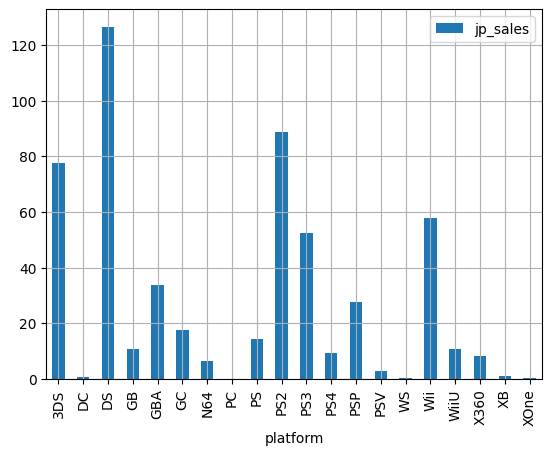

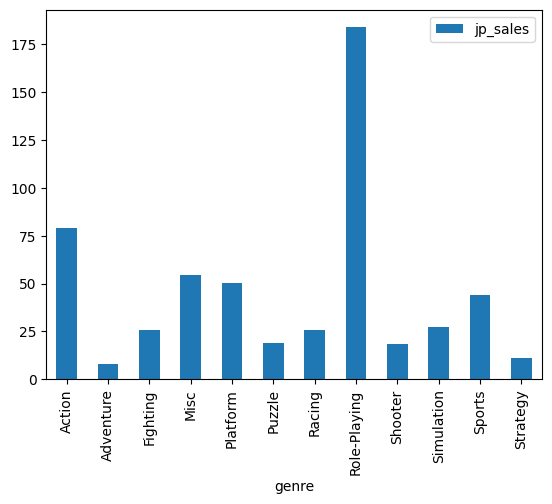

In [81]:
dfjpp.plot(kind='bar',x='platform',y='jp_sales',grid=True);
dfjpg.plot(kind='bar',x='genre',y='jp_sales');

**Conclusion**
* JP platform: The top 3 most popular platforms in number of games sold follows the pattern of the other groups in having the PS3, PS2 and xbox360, the most popular being PS3 with 333 games sold, then PS2 with 248 games and in third, as in Europe the xbox360 with 212 games. However, this means that these platforms have more games than the others, but they weren't the most profitable, the DS with 126.45 million USD being second, the PS2 with 88.83 million USD and the 3DS in third with 77.43 million USD. 
* JP genre: The best-selling genre in Japan was role-playing, with more than double the turnover of second place. Role-playing grossed 183.86 million USD, action 79.13 million USD and misc 54.27 million USD.



**Overall conclusion:** We can see a clear relationship between the number of games sold on the platforms between NA and the EU, but NA shows much more profit, many more people bought the same games than in Europe, NA has more customers. However, we can't say that in Japan because the currency is different and worth less than the USD. We can see a clear relationship between the behavior/culture of the NA and the EU, but something totally different in JP since the best-selling genre was role-playing. The PlayStation platform led in the number of games sold in all groups, but was not the most profitable in two of them (NA and JP). 

## ESRB

* I will visualize whether ESRB ratings affect sales in individual regions

### Na

In [82]:
dfna['rating'].unique()

array(['E', 'unknown', 'M', 'T', 'E10+', 'AO'], dtype=object)

* Pesquisei a classificação
* E = Everyone
* E10+ = Everyone 10+
* K-A = Kids to Adults
* T = Teen 13+
* M = Mature 17+
* AO = Adults Only

,rating,na_sales
0,AO,1.26
2,E10+,247.92
5,unknown,359.33
4,T,537.59
3,M,651.67
1,E,969.94


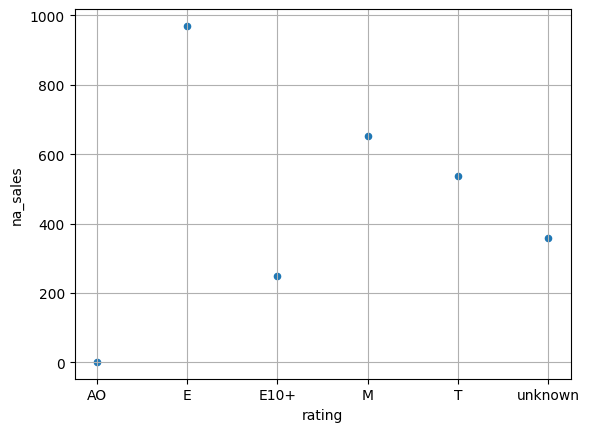

In [83]:
dfnae=dfna.pivot_table(index='rating',values='na_sales',aggfunc='sum').reset_index()
display(dfnae.sort_values('na_sales'))
dfnae.plot(kind='scatter',x='rating',y='na_sales',grid=True);

* since unknown can't be replaced I'll just disregard it

**Conclusion**
* The relationship between esrb and sales is unclear, but we can say that the majority of customers are teenagers aged between 13 and 17 since they can buy the T M and E, which are the best sellers. The one with the fewest restrictions is the best-selling, so it makes sense that from T to M technically the restriction has increased but so have sales.

### Eu

,rating,eu_sales
0,AO,0.61
2,E10+,146.63
5,unknown,271.33
4,T,316.86
3,M,425.44
1,E,598.79


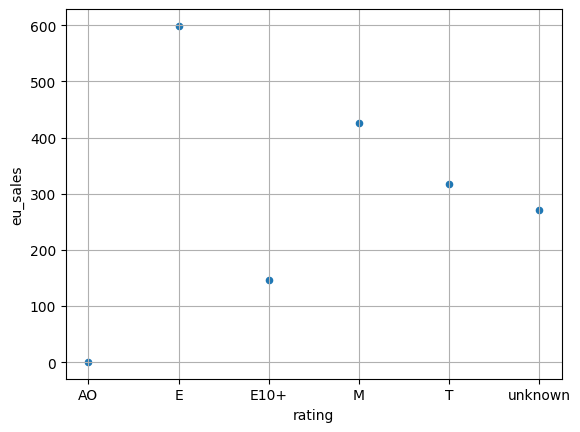

In [84]:
dfeue=dfeu.pivot_table(index='rating',values='eu_sales',aggfunc='sum').reset_index()
display(dfeue.sort_values('eu_sales'))
dfeue.plot(kind='scatter',x='rating',y='eu_sales',grid=True);

**Conclusion**
* The behavior was very similar to that of the NA

### Jp

,rating,jp_sales
1,E10+,32.81
2,M,50.11
3,T,96.67
0,E,177.96
4,unknown,189.47


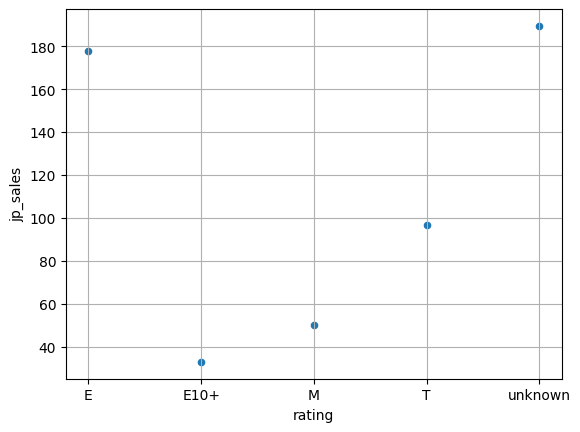

In [85]:
dfjpe=dfjp.pivot_table(index='rating',values='jp_sales',aggfunc='sum').reset_index()
display(dfjpe.sort_values('jp_sales'))
dfjpe.plot(kind='scatter',x='rating',y='jp_sales',grid=True);

* E continues to be the best-seller, but the difference between T and M sales has decreased, with a relationship of the more restrictions the fewer sales, but this has not applied to E10+.

## Teste as hipóteses

In [86]:
#Preparing df for testing
dfxone=df[df['platform']=='XOne']
display(dfxone)
dfpc=df[df['platform']=='PC']
dfpc

,name,platform,yor,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,mediana_yor,tbd,total_sales
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,68.967679,7.125046,unknown,2015.0,0,7.39
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.000000,7.900000,M,2015.0,0,5.47
179,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81.000000,5.400000,M,2015.0,0,5.26
242,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84.000000,6.400000,T,2015.0,0,4.49
270,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88.000000,6.200000,M,2015.0,0,4.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16630,Sébastien Loeb Rally Evo,XOne,2016,Racing,0.00,0.01,0.00,0.00,63.000000,8.200000,E,2015.0,0,0.01
16643,Rugby Challenge 3,XOne,2016,Sports,0.00,0.01,0.00,0.00,68.967679,6.600000,E,2015.0,0,0.01
16645,ZombiU,XOne,2016,Action,0.00,0.01,0.00,0.00,68.967679,7.125046,unknown,2015.0,0,0.01
16660,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74.000000,6.700000,unknown,2015.0,0,0.01


,name,platform,yor,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,mediana_yor,tbd,total_sales
85,The Sims 3,PC,2009,Simulation,0.99,6.42,0.0,0.60,86.000000,7.600000,T,2009.0,0,8.01
138,World of Warcraft,PC,2004,Role-Playing,0.08,6.21,0.0,0.00,93.000000,7.300000,T,2010.0,0,6.29
192,Diablo III,PC,2012,Role-Playing,2.44,2.16,0.0,0.54,88.000000,4.000000,M,2010.0,0,5.14
195,Microsoft Flight Simulator,PC,1996,Simulation,3.22,1.69,0.0,0.20,68.967679,7.125046,unknown,2009.0,0,5.11
218,StarCraft II: Wings of Liberty,PC,2010,Strategy,2.57,1.68,0.0,0.58,93.000000,8.200000,T,2008.0,0,4.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16690,Pony Friends 2,PC,2009,Simulation,0.00,0.01,0.0,0.00,68.967679,7.125046,unknown,2009.0,0,0.01
16692,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,0.00,0.01,0.0,0.00,80.000000,7.600000,M,2011.0,0,0.01
16696,Breach,PC,2011,Shooter,0.01,0.00,0.0,0.00,61.000000,5.800000,T,2010.0,0,0.01
16702,STORM: Frontline Nation,PC,2011,Strategy,0.00,0.01,0.0,0.00,60.000000,7.200000,E10+,2008.0,0,0.01


* - The average ratings of users of the Xbox One and PC platforms are the same.
* h0 the means are different (disagrees with the thesis)
* h1 the averages are not different (agrees with the thesis)

In [87]:
Xone= dfxone['user_score']
Pc=dfpc['user_score']
varianciaxone= np.var(Xone)
varianciapc = np.var(Pc)
display(varianciaxone,varianciapc)
from scipy.stats import levene
display(levene(Xone,Pc,center='mean'))

alpha=0.05
results= st.ttest_ind(Xone, Pc, equal_var = True)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We cannot reject the null hypothesis")

1.4680853201369655

1.8487647534449687

LeveneResult(statistic=0.9795692746755549, pvalue=0.3225015792619119)

p-value: 3.329648256313532e-05
We reject the null hypothesis


* In this test I used the Hypothesis about the Equality of the Averages of Two Populations, because I needed to test the averages of two different statistical populations, but I left equal_var=True because the variance is close according to the Levene test.

In [88]:
#Preparing df for testing
dfaction=df[df['genre']=='Action']
display(dfaction)
dfsports=df[df['genre']=='Sports']
dfsports

,name,platform,yor,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,mediana_yor,tbd,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.000000,8.200000,M,2011.0,0,21.05
17,Grand Theft Auto: San Andreas,PS2,2004,Action,9.43,0.40,0.41,10.57,95.000000,9.000000,M,2005.0,0,20.81
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.000000,8.100000,M,2010.0,0,16.27
24,Grand Theft Auto: Vice City,PS2,2002,Action,8.41,5.49,0.47,1.78,95.000000,8.700000,M,2005.0,0,16.15
38,Grand Theft Auto III,PS2,2001,Action,6.99,4.51,0.30,1.30,97.000000,8.500000,M,2005.0,0,13.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16692,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,0.00,0.01,0.00,0.00,80.000000,7.600000,M,2011.0,0,0.01
16694,Carmageddon 64,N64,1999,Action,0.01,0.00,0.00,0.00,68.967679,7.125046,unknown,1999.0,0,0.01
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.00,0.00,67.000000,7.125046,E,2003.0,1,0.01
16699,The Longest 5 Minutes,PSV,2016,Action,0.00,0.00,0.01,0.00,68.967679,7.125046,unknown,2015.0,0,0.01


,name,platform,yor,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,mediana_yor,tbd,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.000000,8.000000,E,2009.0,0,82.54
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.000000,8.000000,E,2009.0,0,32.77
13,Wii Fit,Wii,2007,Sports,8.92,8.03,3.60,2.15,80.000000,7.700000,E,2009.0,0,22.70
15,Wii Fit Plus,Wii,2009,Sports,9.01,8.49,2.53,1.77,80.000000,7.400000,E,2009.0,0,21.80
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.000000,4.300000,E,2015.0,0,8.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16676,G1 Jockey 4 2008,PS3,2008,Sports,0.00,0.00,0.00,0.00,68.967679,7.125046,unknown,2010.0,0,0.00
16688,Outdoors Unleashed: Africa 3D,3DS,2011,Sports,0.01,0.00,0.00,0.00,68.967679,7.125046,T,2011.0,1,0.01
16693,PGA European Tour,N64,2000,Sports,0.01,0.00,0.00,0.00,68.967679,7.125046,unknown,1998.0,0,0.01
16700,Mezase!! Tsuri Master DS,DS,2009,Sports,0.00,0.00,0.01,0.00,68.967679,7.125046,unknown,2008.0,0,0.01


* - The average user ratings for the Action and Sports genres are different.
* h0=the means are equal (disagrees with the thesis)
* h1=the means are not equal(agrees with the thesis)

In [89]:

Action = dfaction['user_score']
Sports = dfsports['user_score']
vara=np.var(Action)
varb=np.var(Sports)
print(vara,varb)
from scipy.stats import levene
display(levene(Action,Sports,center='mean'))

alpha=0.05
results= st.ttest_ind(Action, Sports,equal_var = True)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We cannot reject the null hypothesis")


1.1042681705331736 1.2253239128600197


LeveneResult(statistic=0.44302805730054184, pvalue=0.5056914123695931)

p-value: 0.18372589312608184
We cannot reject the null hypothesis


* In this test I used the Hypothesis about the Equality of the Averages of Two Populations, because I needed to test the averages of two different statistical populations, but I left equal_var=True because the variance is close according to the Levene test.

## General conclusion

* Among everything that has been analyzed, we can see some patterns of success in games. Patterns such as being of the action, sports or shooter genre in NA and EU, regarding the classification, prefer E or Mature and should be released on the newer platforms such as PS4 and XboxOne which are the ones that sell the most. But keep an eye on the PC platforms, which have been alive on the market for a long time, the WiiU, which could launch a new one if it dies, and the 3DS, which doesn't sell much but is still alive.
* In Japan it's a different story, there you should keep an eye out for games with an E or T rating and mainly in the role-playing genre followed by action and platform, among the live platforms you should prioritize 3DS, wiiU, PS4, XboxOne and Pc in that order.
* Always prefer PlayStation to Xbox in any group as it sells more.
* Keep an eye on the PS4 XboxOne wiiu and 3ds platforms when they launch new platforms because in the first few years they usually increase game sales.

* In short, a successful game in the US or NA would be a PS4 Action game and an E rating. In Japan an E-rated Role-Playing game on the 3DS platform.